In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

from math import pi

pd.set_option('display.max_columns', None)

In [27]:
df = pd.read_csv('dataset/marketing_campaign_clean.csv')

In [28]:
df.head(3)

,education,income,recency,wines,fruits,meat,fish,sweets,gold,deals_purchases,web_purchases,catalog_purchases,store_purchases,web_visits_month,campaign_3,campaign_4,campaign_5,campaign_1,campaign_2,complain,response,living_with,age,total_spent,children,family_size,monetary,total_purchases,total_accepted_cmp,frequency,avg_purchase_value
0,Graduate,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,Alone,67,1617,0,1,1617,25,0,2.083333,64.680000
1,Graduate,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,Alone,70,27,2,3,27,6,0,0.600000,4.500000
2,Graduate,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,Partner,59,776,0,2,776,21,0,1.909091,36.952381


### Feature Engineering

In [29]:
df2 = df.copy()

#### Encoding categorical features

In [30]:
cat = (df2.dtypes == 'object')
object_cols = list(cat[cat].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['education', 'living_with']


In [31]:
education_mapping = {
    "Undergraduate": 0,
    "Graduate": 1,
    "Postgraduate": 2
}
df2.education = df2.education.map(education_mapping)

In [32]:
living_status_mapping = {
    "Alone": 0,
    "Partner": 1,
}
df2.living_with = df2.living_with.map(living_status_mapping)

In [33]:
cat = (df2.dtypes == 'object')
object_cols = list(cat[cat].index)

In [34]:
le = LabelEncoder()
for i in object_cols:
    df2[i] = df2[[i]].apply(le.fit_transform)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   education           2229 non-null   int64  
 1   income              2229 non-null   float64
 2   recency             2229 non-null   int64  
 3   wines               2229 non-null   int64  
 4   fruits              2229 non-null   int64  
 5   meat                2229 non-null   int64  
 6   fish                2229 non-null   int64  
 7   sweets              2229 non-null   int64  
 8   gold                2229 non-null   int64  
 9   deals_purchases     2229 non-null   int64  
 10  web_purchases       2229 non-null   int64  
 11  catalog_purchases   2229 non-null   int64  
 12  store_purchases     2229 non-null   int64  
 13  web_visits_month    2229 non-null   int64  
 14  campaign_3          2229 non-null   int64  
 15  campaign_4          2229 non-null   int64  
 16  campai

In [36]:
df2.fillna(df2.mean(), inplace=True)

#### Dropping features

In [37]:
to_del = ['campaign_1', 'campaign_2', 'campaign_3', 'campaign_4', 'campaign_5', 'complain', 'response', 'total_accepted_cmp', 'recency']
df2 = df2.drop(to_del, axis=1)

#### Standardazing the features

In [38]:
scaler = StandardScaler()
scaler.fit(df2)
scaled_df = pd.DataFrame(scaler.transform(df2), columns=df2.columns)

In [39]:
scaled_df.sample(5)

,education,income,wines,fruits,meat,fish,sweets,gold,deals_purchases,web_purchases,catalog_purchases,store_purchases,web_visits_month,living_with,age,total_spent,children,family_size,monetary,total_purchases,frequency,avg_purchase_value
1384,1.125153,-0.618635,-0.831609,-0.637618,-0.694449,-0.688309,-0.657191,-0.789428,-0.696567,-1.117198,-0.943150,-0.867668,0.689920,0.743121,-0.265811,-0.937832,0.063851,0.445057,-0.937832,-1.295063,-1.244057,-0.552632
1385,-1.944573,-0.484099,-0.882101,-0.562156,-0.699010,-0.414027,-0.560409,-0.290192,-0.168815,-1.117198,-0.585437,-1.176175,-0.552605,-1.345676,-0.522116,-0.887907,1.393978,0.445057,-0.887907,-1.163838,-1.244057,-0.472650
648,1.125153,-0.049174,-0.816759,-0.612464,-0.639727,-0.688309,-0.632996,-0.674219,-0.696567,-1.117198,-0.585437,-0.559160,-1.380954,0.743121,1.613760,-0.896228,0.063851,0.445057,-0.896228,-1.032612,-0.952193,-0.526606
2095,-1.944573,-1.817809,-0.899922,-0.486694,-0.703570,-0.395742,-0.366843,-0.328594,-0.696567,-0.756817,-0.943150,-0.559160,0.275745,0.743121,-0.265811,-0.882915,-1.266277,-0.657201,-0.882915,-1.032612,-1.045059,-0.501215
448,1.125153,-0.747636,-0.864280,-0.612464,-0.616926,-0.542026,-0.608800,-0.789428,-0.696567,-0.756817,-0.943150,-0.559160,-0.138430,-1.345676,-0.180376,-0.909541,0.063851,-0.657201,-0.909541,-1.032612,-1.045059,-0.551997


#### Applying PCA

In [40]:
pca = PCA(n_components=3)
pca.fit(scaled_df)
pca_columns = ["PC1", "PC2", "PC3"]
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=pca_columns)
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2229.0,-1.912632e-17,3.158807,-5.455588,-2.981699,-0.693360,2.799934,8.388830
PC2,2229.0,6.375440e-18,1.624501,-9.000568,-1.160723,-0.191046,1.018009,6.551130
PC3,2229.0,-3.108027e-17,1.173995,-5.688655,-0.817286,0.098560,0.830878,8.592075


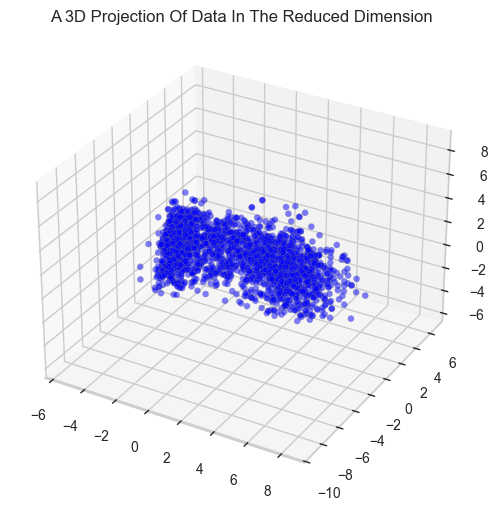

In [41]:
x = PCA_df[pca_columns[0]]
y = PCA_df[pca_columns[1]]
z = PCA_df[pca_columns[2]]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="blue", alpha=0.5, edgecolors="grey", marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### Clustering Model

#### Selecting the number of clusters

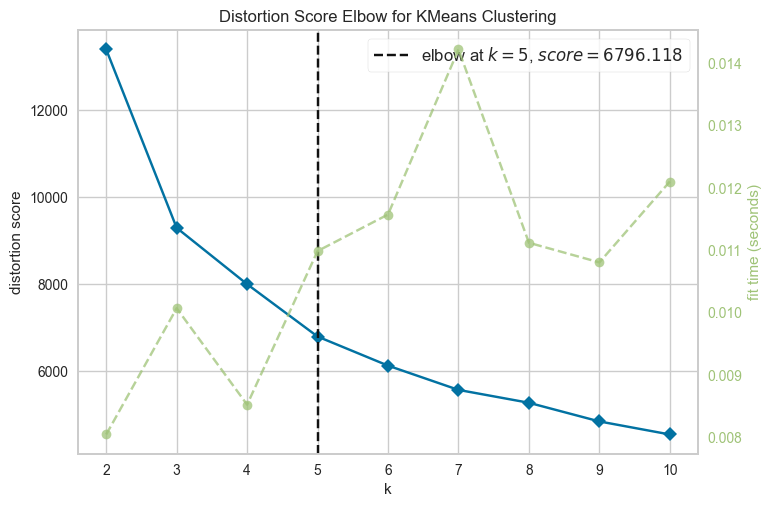

In [42]:
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10, n_init=50, init='k-means++')
Elbow_M.fit(PCA_df)
Elbow_M.show()
plt.show()

#### Creating the KMeans model

In [43]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=50, init='k-means++')
cluster_labels = kmeans.fit_predict(PCA_df)

In [44]:
PCA_df["Clusters"] = cluster_labels
df["Clusters"] = cluster_labels
df2["Clusters"] = cluster_labels
scaled_df["Clusters"] = cluster_labels

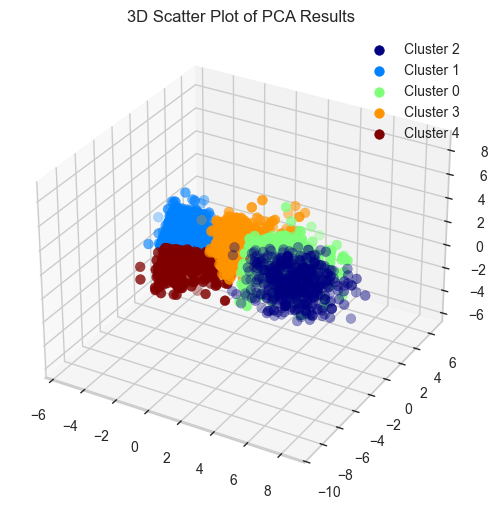

In [45]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = PCA_df[pca_columns[0]]
y = PCA_df[pca_columns[1]]
z = PCA_df[pca_columns[2]]

clusters = PCA_df['Clusters'].unique()

colors = plt.cm.jet(np.linspace(0, 1, len(clusters)))

for cluster, color in zip(clusters, colors):
    ix = PCA_df['Clusters'] == cluster
    ax.scatter(x[ix], y[ix], z[ix], c=[color], label=f'Cluster {cluster}', s=50)
    
ax.set_title('3D Scatter Plot of PCA Results')
ax.legend()
plt.show()

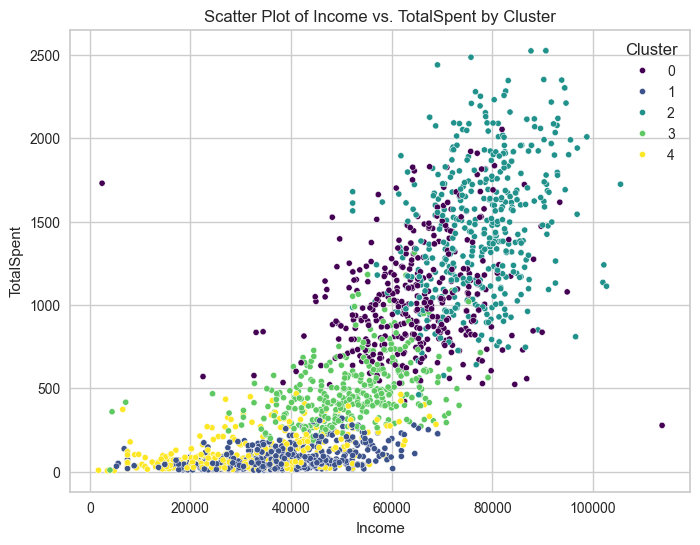

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income', y='total_spent', hue='Clusters', data=df, palette='viridis', s=20)

plt.title('Scatter Plot of Income vs. TotalSpent by Cluster')
plt.xlabel('Income')
plt.ylabel('TotalSpent')
plt.legend(title='Cluster')
plt.show()

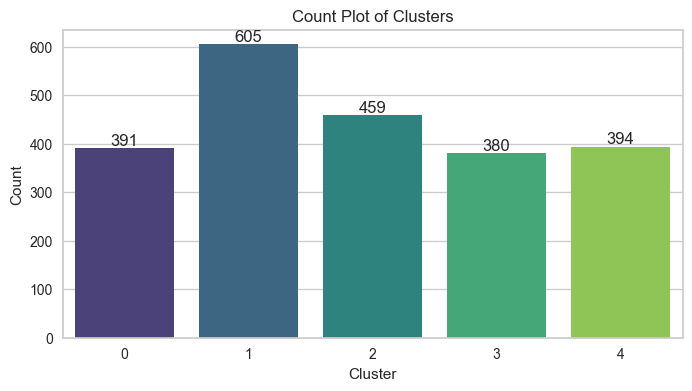

In [47]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Clusters', data=df, palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count Plot of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

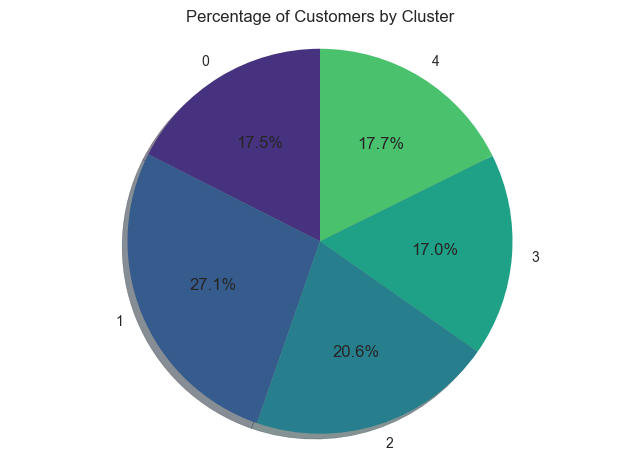

In [64]:
labels = '0', '1', '2', '3', '4'
sizes = df.groupby(['Clusters'])['Clusters'].count() / len(df)*100

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=sns.color_palette('viridis'))
ax1.axis('equal')

plt.title('Percentage of Customers by Cluster')
plt.show()

In [49]:
features = ['education', 'income', 'web_visits_month', 'age', 'total_spent', 'living_with', 'children', 'family_size']
grouped_clusters = df2.groupby(['Clusters'])[features].mean()
grouped_clusters

,education,income,web_visits_month,age,total_spent,living_with,children,family_size
Clusters,,,,,,,,
0,1.319693,64796.902184,5.051151,58.204604,1037.493606,0.647059,0.918159,2.565217
1,1.376860,36765.714067,6.355372,54.933884,78.912397,0.851240,1.505785,3.357025
2,1.281046,77473.193912,2.446623,55.546841,1453.320261,0.579521,0.069717,1.649237
3,1.418421,52035.119097,6.318421,58.131579,488.152632,0.734211,1.392105,3.126316
4,0.883249,30883.923872,6.461929,48.893401,111.109137,0.312183,0.738579,2.050761


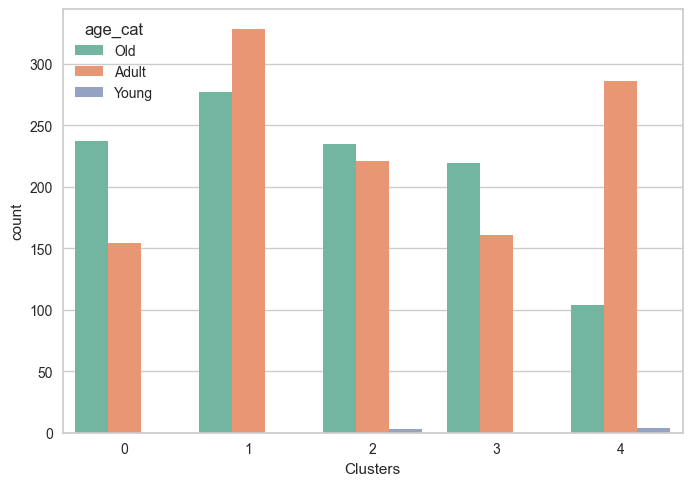

In [50]:
df2['age_cat'] = df2['age'].apply(lambda x: 'Young' if x < 30 else 'Adult' if x < 55 else 'Old')
sns.countplot(x='Clusters', hue='age_cat', data=df2, palette='Set2')
plt.show()

**Cluster 0**

- Customers: 391;
- Avg. Income: $ 64,796.00;
- Avg. Total Spent: $ 1,037.00;
- Web Visits: Up to 5 visits per month;
- Children: Mostly with at least one child;
- Marital Status: Mostly with a partner, but not overwhelmingly so.
- Education: At least graduated, with some having completed postgraduate studies as well.
- Age: Commonly older people.

**Cluster 1**

- Customers: 605;
- Income: $ 36,765.00;
- Total Spent: $ 79.00;
- Web Visits: Up to 6 visits per month;
- Children: 1 or more children;
- Marital Status: With a partner.
- Education: At least graduated, with many having completed postgraduate studies as well.
- Age: Commonly middle-aged people.

**Cluster 2**

- Customers: 459;
- Income: $ 77,473.00;
- Total Spent: $ 1453.00;
- Web Visits: Up to 2 visits per month;
- Children: Mostly without a child;
- Marital Status: Mostly with a partner, but not overwhelmingly so.
- Education: At least graduated, with some having completed postgraduate studies as well.
- Age: Commonly old and middle-aged people, but has some young people.

**Cluster 3**

- Customers: 380;
- Income: $ 52,035.00;
- Total Spent: $ 488.00;
- Web Visits: Up to 6 visits per month;
- Children: 1 or more children;
- Marital Status: Mostly with a partner.
- Education: At least graduated, with many having completed postgraduate studies as well.
- Age: Commonly older people.

**Cluster 4**

- Customers: 394;
- Income: $ 30,883.00;
- Total Spent: $ 111.00;
- Web Visits: Up to 6 visits per month;
- Children: Mostly with at least one child;
- Marital Status: Mostly without a partner.
- Education: Mostly on graduated levels, but some with only basic level..
- Age: Commonly middle-aged people, but has the majority of the young people.

#### Cluster Analysis - Purchases

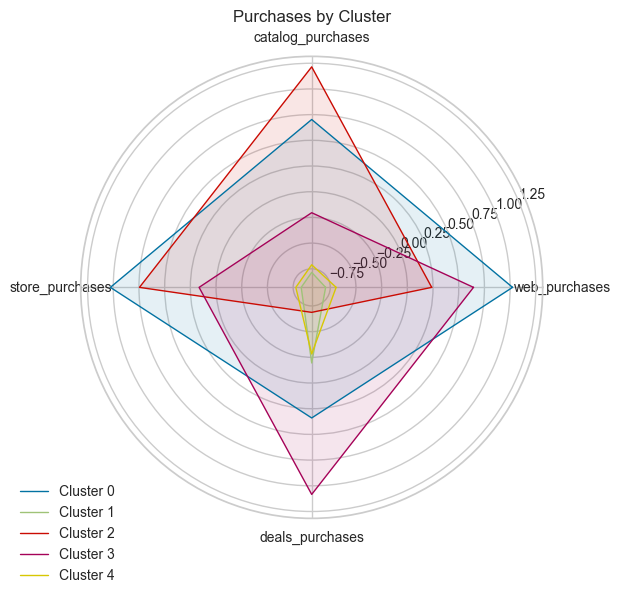

In [51]:
attributes = ['web_purchases', 'catalog_purchases', 'store_purchases', 'deals_purchases']
cluster_means = scaled_df.groupby('Clusters')[attributes].mean().reset_index()

num_vars = len(attributes)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

plt.title('Purchases by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

**Cluster 0.** Makes numerous purchases, showing no strong preference for any particular purchase method. However, store and web purchases are slightly more common.

**Cluster 1.** Makes few purchases, with a most commonly preference high preference for deals.

**Cluster 2.** Makes a lot of purchases, showing preferences over store and catalog purchases.

**Cluster 3.** Makes a lot of purchases, showing preferences over deals and web purchases.

**Cluster 4.** Makes few purchases, with a most commonly preference high preference for deals.

#### Cluster Analysis - Products

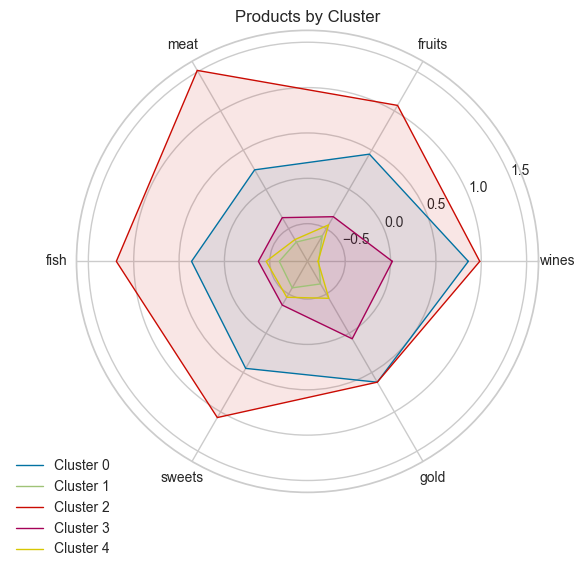

In [52]:
attributes = ['wines', 'fruits', 'meat', 'fish', 'sweets', 'gold']
cluster_means = scaled_df.groupby('Clusters')[attributes].mean().reset_index()

num_vars = len(attributes)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

plt.title('Products by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

**Cluster 0.** This group buys a decent amount between all types of products, with a slight preference for wines and gold.

**Cluster 1.** This group purchases the fewest amount of products and shows a slight preference for food items.

**Cluster 2.** This group makes a lot of purchases, with no major preference. However, food items are most commonly bought.

**Cluster 3.** This group makes a decent amount of purchases, with a preference for wines and gold products.

**Cluster 4.** This group purchases fewer products but shows a slight preference for food items, such as fruits, fish. However, spends some of their budget in gold products as well.

#### Cluster Analysis - Campaings

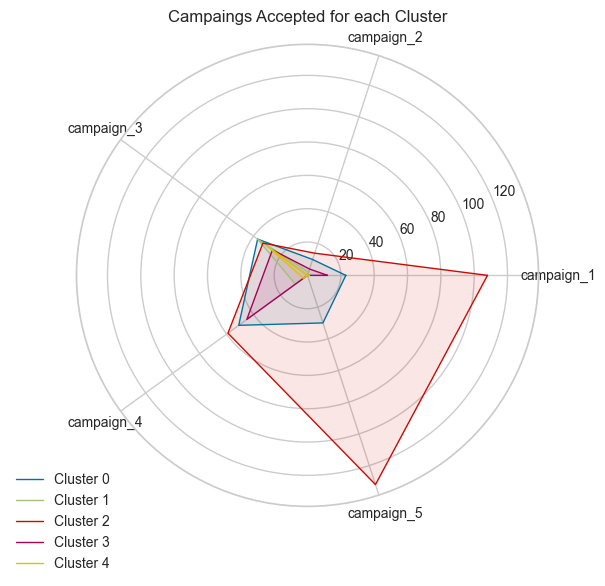

In [53]:
attributes = ['campaign_1', 'campaign_2', 'campaign_3', 'campaign_4', 'campaign_5']
cluster_means = df.groupby('Clusters')[attributes].sum().reset_index()

num_vars = len(attributes)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

plt.title('Campaings Accepted for each Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

**Cluster 0.** This group responded well to campaings 4 and 3, but 1 and 5 have a decent approval too.

**Cluster 1.** This group didn't respond well to any campaigns, but with improvements, campaign 3 might be better received.

**Cluster 2.** This group responded very well to campaigns 1 and 5.

**Cluster 3.** This group responded well to campaing 4.

**Cluster 4.** This group didn't respond well to any campaigns, but with improvements, campaign 3 might be better received.

#### Insights on Cluster Profiles:

##### Cluster 0 - "Affluent Families":

- Features the second highest income and spending.
- Typically consists of a couple with one child.
- Mostly on graduated to postgraduate education levels.
- Makes numerous purchases, showing no strong preference for any particular purchase method.
- Shows a significant expenditure on all types of products.
- Predominantly responds to campaign 3, 4 and 5.
- Commonly older people
- Frequently uses the web application.

##### Cluster 1 - "Discount Seekers":

- Characterized by the second lowest income and the lowest spending.
- Typically consists of the largest families.
- Mostly on graduated to postgraduate education levels.
- Purchases primarily through deals purchases.
- Purchases fewer products but shows a slight preference for food products.
- Shows a low rate of campaign acceptance, with campaign 3 the most accepted.
- Commonly middle-aged people
- Frequently uses the web application.

##### Cluster 2 - "Prosperous Shoppers":

- Exhibits the highest income and spending.
- Contains the smallest families, meaning that has no children.
- Mostly on graduated to postgraduate education levels.
- Makes a lot of purchases, showing preference over store and catalog purchases.
- Shows significant expenditure without a major preference.
- Shows a high acceptance rate for campaigns 1 and 5.
- Commonly old and middle-aged people, but has some young people.
- Commonly don't use the web application.

##### Cluster 3 - "Web Enthuasiats":

- Noted for the average income and spending.
- Comprises couples with one or more children.
- Mostly on graduated to postgraduate education levels.
- Frequently purchases through deals and web.
- Shows a decent expenditure with a preference over wines and gold products.
- Shows a high acceptance rate for campaign 4.
- Commonly older people.
- Frequently uses the web application.

##### Cluster 4 - "Low Budget":

- Noted for the lowest income and the second lowest spending.
- Comprises families of single parent.
- Mostly on graduated levels, but some with only basic level.
- Frequently purchases through deals.
- Purchases fewer products but shows a slight preference for food and gold products
- Shows a low rate of campaign acceptance, with campaign 3 the most accepted.
- Commonly old and middle-aged people, but has the majority of the young people.
- Frequently uses the web application.

In [54]:
clusters_df = df.copy()
clusters_df['Clusters'].replace({0: 'Affluent Families', 1: 'Discount Seekers', 
                                 2: 'Prosperous', 3: 'Web Enthusiasts', 
                                 4: 'Low Budget'}, inplace=True)

Represent the influece of each to the total revenue of the company

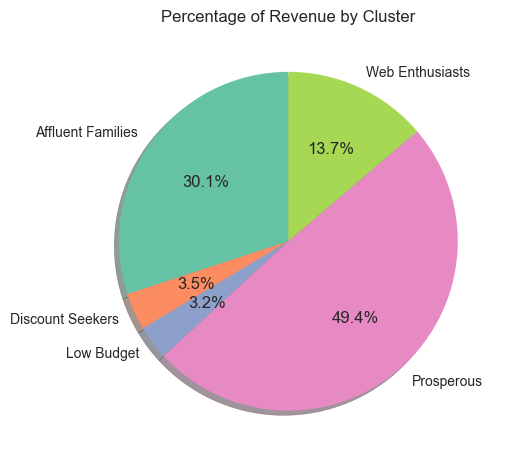

In [66]:
labels = 'Affluent Families', 'Discount Seekers', 'Low Budget', 'Prosperous', 'Web Enthusiasts'
sizes = clusters_df.groupby(['Clusters'])['monetary'].sum() / df['monetary'].sum()*100

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=sns.color_palette('Set2'))

plt.title('Percentage of Revenue by Cluster')
plt.show()

Prosperous represents almost 50% of the total revenue. Adding the Affluent Families, they've 80% of total revenue.

Represent the frequency of each clusters comparing to the average value of all clusters.

In [56]:
clusters_df.groupby(['Clusters'])['frequency'].mean() / df['frequency'].mean()

Clusters
Affluent Families    1.572945
Discount Seekers     0.509648
Low Budget           0.533967
Prosperous           1.355590
Web Enthusiasts      1.244850
Name: frequency, dtype: float64

Prosperous and Affluent Families are the ones that buys more frequently.

Represent the acceptance of each clusters comparing to the average value of all clusters.

In [57]:
clusters_df.groupby(['Clusters'])['total_accepted_cmp'].mean() / df['total_accepted_cmp'].mean()

Clusters
Affluent Families    1.292516
Discount Seekers     0.265535
Low Budget           0.288814
Prosperous           2.522895
Web Enthusiasts      0.766252
Name: total_accepted_cmp, dtype: float64

Prosperous have the highest acceptance of marketing campaings.

### Loyalty Program

Ideally, our best customers for the loyalt program is the Cluster 2 - Prosperous Shoppers, 'cause they've
- a high income;
- bought a lot of products;
- responded well to campaings.
- represented 49% of the total revenue.

In [58]:
df4 = pd.read_csv('./dataset/marketing_campaign.csv', sep='\t')

In [59]:
ids = df4['ID']
loyalty_prog_df = clusters_df.copy()
loyalty_prog_df['ids'] = ids
loyalty_prog_df.loc[loyalty_prog_df['Clusters'] == 'Prosperous', 'ids']

0        5524
12       2125
15       2114
29       1966
34       8755
        ...  
2203     2736
2207     4333
2211    10469
2218     4838
2226     4478
Name: ids, Length: 459, dtype: int64

In [60]:
size = len(loyalty_prog_df.loc[loyalty_prog_df['Clusters'] == 'Prosperous'])
print(f'The Prosperous cluster has {size} customers.')

The Prosperous cluster has 459 customers.


### Financial Results

#### Presumptions
- I'll project the potential tangible financial outcomes of our loyalty program, which was created using consumer segmentation clustering modelling.
- Let's assume that the retail establishment can enhance the income of its Prosperous clientele by 15% by focused marketing efforts, customised merchandise, and exclusive deals.
- Since Prosperous and Affluent Families clients are comparable, let's estimate a 25% conversion rate for Prosperous customers.
- Assuming the following conversion rates to Prosperous, given that the other categories are more dissimilar from Prosperous customers: Low Budget = 3%; Web Enthusiasts = 5%; and Discount Seekers = 8%.

In [61]:
sample_idxs = loyalty_prog_df.loc[loyalty_prog_df['Clusters'] == 'Affluent Families'].sample(frac=0.25).index
loyalty_prog_df.loc[sample_idxs, 'Clusters'] = 'Prosperous'

sample_idxs = loyalty_prog_df.loc[loyalty_prog_df['Clusters'] == 'Web Enthusiasts'].sample(frac=0.05).index
loyalty_prog_df.loc[sample_idxs, 'Clusters'] = 'Prosperous'

sample_idxs = loyalty_prog_df.loc[loyalty_prog_df['Clusters'] == 'Discount Seekers'].sample(frac=0.08).index
loyalty_prog_df.loc[sample_idxs, 'Clusters'] = 'Prosperous'

sample_idxs = loyalty_prog_df.loc[loyalty_prog_df['Clusters'] == 'Low Budget'].sample(frac=0.03).index
loyalty_prog_df.loc[sample_idxs, 'Clusters'] = 'Prosperous'

In [62]:
loyalty_prog_df['monetary'] = loyalty_prog_df.apply(lambda x: x['monetary'] * 1.15 if x['Clusters'] == 'Prosperous' else x['monetary'], axis=1)
total_revenue_before = clusters_df['monetary'].sum()
total_revenue_after = loyalty_prog_df['monetary'].sum()

print(f'Total revenue before Prosperous loyalty program: ${round(total_revenue_before, 2):,.2f}.')
print(f'Total revenue after Prosperous loyalty program: ${round(total_revenue_after, 2):,.2f}')
print(f'Revenue increased by {round(((total_revenue_after - total_revenue_before)/total_revenue_before), 2)*100:.2f}%')
print(f'Revenue increased in ${round(total_revenue_after - total_revenue_before, 2):,.2f}.')

Total revenue before Prosperous loyalty program: $1,349,751.00.
Total revenue after Prosperous loyalty program: $1,467,133.65
Revenue increased by 9.00%
Revenue increased in $117,382.65.


### Conclusion

The loyalty program has the potential to increase the total store revenue by 9%, amounting to $117,435.00.